### 연습 문제 10-1

In [16]:
num_lec=[13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness=[70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

In [17]:
import numpy as np

X=np.hstack((np.ones((20,1)), np.array(num_lec, ndmin=2).T))
X_leftinv=np.linalg.inv(X.T@X)@X.T

beta=X_leftinv@happiness

In [18]:
beta

array([23.13033815,  3.69820606])

In [19]:
predicted_happiness=X@beta

In [20]:
residual=happiness-predicted_happiness

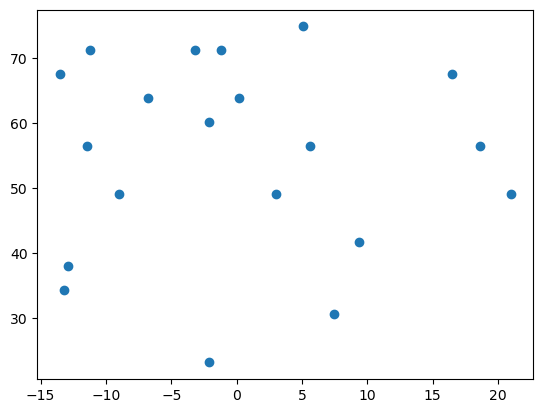

In [21]:
import matplotlib.pyplot as plt

plt.scatter(residual,predicted_happiness)

In [32]:
inner=residual@predicted_happiness

In [33]:
corr=np.corrcoef(residual, predicted_happiness)

In [34]:
print(inner, corr[0][1]) 

-1.2960299500264227e-11 1.1238816294632071e-15


In [35]:
print(round(inner), round(corr[0][1]))

0 0


In [41]:
abs(-1.2960299500264227e-11)>abs(1.1238816294632071e-15) #상관계수가 더 작은 값을 가진다.

True

In [ ]:
# 이유는 ... 음 벡터의 크기 때문에??

### 연습 문제 10-3

In [43]:
from scipy.linalg import null_space

In [45]:
# 이게 무슨 말일까..
nullspace = null_space(X.T)

nullspaceAugment = np.hstack( (nullspace,residual.reshape(-1,1)) )

print(f'dim(  N(X)    ) = {np.linalg.matrix_rank(nullspace)}')
print(f'dim( [N(X)|r] ) = {np.linalg.matrix_rank(nullspaceAugment)}')

dim(  N(X)    ) = 18
dim( [N(X)|r] ) = 18


### 연습 문제 10-4

In [57]:
num_lec1=[13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness1=[17,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
num_lec2=[13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness2=[170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]# 첫 번째 데이터 점 70->170
num_lec3=[13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness3=[17,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170]# 마지막 데이터 점 70->170

In [58]:
X=np.hstack((np.ones((20,1)), np.array(num_lec1, ndmin=2).T))
X_leftinv=np.linalg.inv(X.T@X)@X.T

beta=X_leftinv@happiness1

predicted_happiness1=X@beta

residual1=happiness1-predicted_happiness1

In [85]:
X=np.hstack((np.ones((20,1)), np.array(num_lec2, ndmin=2).T))
X_leftinv=np.linalg.inv(X.T@X)@X.T

beta=X_leftinv@happiness1

predicted_happiness2=X@beta

residual2=happiness2-predicted_happiness2

In [86]:
X=np.hstack((np.ones((20,1)), np.array(num_lec3, ndmin=2).T))
X_leftinv=np.linalg.inv(X.T@X)@X.T

beta=X_leftinv@happiness3

predicted_happiness3=X@beta

residual3=happiness3-predicted_happiness3

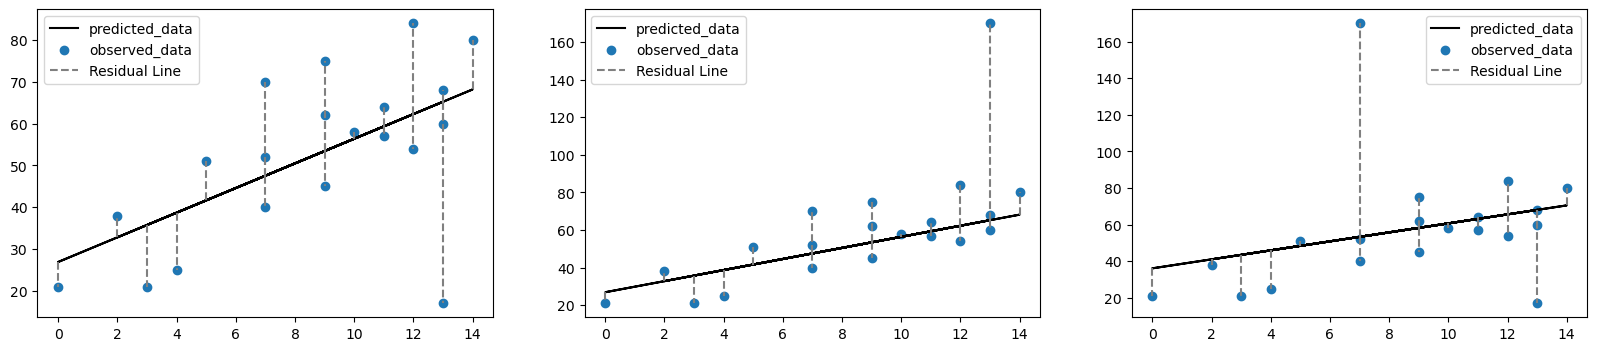

In [90]:
f, axes=plt.subplots(1,3)

f.set_size_inches(20,4)
axes[0].plot(num_lec1, predicted_happiness1, color='black', label='predicted_data')
axes[0].scatter(num_lec1, happiness1, label='observed_data')

for i in range(len(num_lec1)):
    if i == 0:
        axes[0].plot([num_lec1[i], num_lec1[i]], [predicted_happiness1[i], happiness1[i]], color='gray', linestyle='--', label="Residual Line")
    else:
        axes[0].plot([num_lec1[i], num_lec1[i]], [predicted_happiness1[i], happiness1[i]], color='gray', linestyle='--')

axes[1].plot(num_lec2, predicted_happiness2, color='black', label='predicted_data')
axes[1].scatter(num_lec2, happiness2, label='observed_data')

for i in range(len(num_lec2)):
    if i == 0:
        axes[1].plot([num_lec2[i], num_lec2[i]], [predicted_happiness2[i], happiness2[i]], color='gray', linestyle='--', label="Residual Line")
    else:
        axes[1].plot([num_lec2[i], num_lec2[i]], [predicted_happiness2[i], happiness2[i]], color='gray', linestyle='--')

axes[2].plot(num_lec3, predicted_happiness3, color='black', label='predicted_data')
axes[2].scatter(num_lec3, happiness3, label='observed_data')

for i in range(len(num_lec3)):
    if i == 0:
        axes[2].plot([num_lec3[i], num_lec3[i]], [predicted_happiness3[i], happiness3[i]], color='gray', linestyle='--', label="Residual Line")
    else:
        axes[2].plot([num_lec3[i], num_lec3[i]], [predicted_happiness3[i], happiness3[i]], color='gray', linestyle='--')

axes[1].legend()
axes[0].legend()
axes[2].legend()

plt.show()


### 연습 문제 10-5

In [166]:
X=np.random.randn(6,6)
Y=np.eye(6)

- 첫 번째 방법: 왼쪽 역 최소제곱법을 사용해 한 번에 한 열씩 행렬을 계산

In [167]:
beta1=np.zeros((6,6))
for i in range(6):
    X_leftinv=np.linalg.inv(X.T@X)@X.T
    beta1[:, i]=X_leftinv@Y[:, i]

- 두 번째 방법: 왼쪽 역행렬 방법을 사용해 한줄의 코드로 전체 B행렬 계산

In [168]:
X_leftinv=np.linalg.inv(X.T@X)@X.T
beta2=X_leftinv@Y

- 세 번째 방법: np.linalg.inv() 함수를 사용해 X⁻¹을 계산

In [169]:
beta3=np.linalg.inv(X)

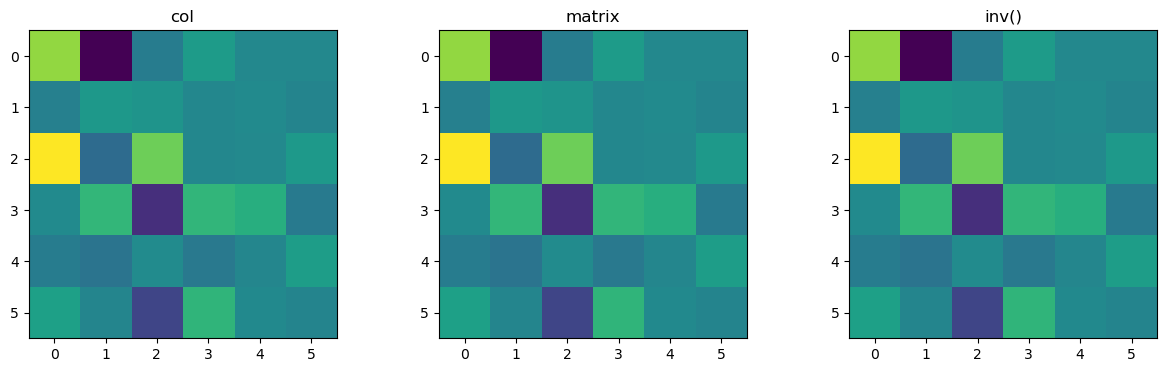

In [170]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(15, 4)

axes[0].imshow(beta1 * X)
axes[0].set_title("col")

axes[1].imshow(beta2 * X)
axes[1].set_title("matrix")

axes[2].imshow(beta3 * X)
axes[2].set_title("inv()")

plt.show()
